In [8]:
# Top import & setup cell (run once)
!pip install qiskit qiskit-aer pylatexenc --quiet
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import qiskit.qasm3 as qasm3
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

print("Circuit:")
print(qc.draw(output='text'))

# OpenQASM 3 via qasm3.dumps
qasm3_code = qasm3.dumps(qc)
print("\nOpenQASM 3 code:")
print(qasm3_code)

# simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
res = sim.run(compiled, shots=1024).result()
print("\nCounts:", res.get_counts())


Circuit:
        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 

OpenQASM 3 code:
OPENQASM 3.0;
include "stdgates.inc";
bit[2] meas;
qubit[2] q;
h q[0];
cx q[0], q[1];
barrier q[0], q[1];
meas[0] = measure q[0];
meas[1] = measure q[1];


Counts: {'11': 511, '00': 513}


## Task 1: 3-qubit circuit with a different gate sequence

In [10]:
qc3 = QuantumCircuit(3)
qc3.h(0)
qc3.cx(0,1)
qc3.ccx(0,1,2)   # Toffoli (control 0 & 1 -> target 2)
qc3.barrier()
qc3.measure_all()

print("3-qubit circuit:")
print(qc3.draw(output='text'))


3-qubit circuit:
        ┌───┐           ░  ░ ┌─┐      
   q_0: ┤ H ├──■────■───░──░─┤M├──────
        └───┘┌─┴─┐  │   ░  ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──░──╫─┤M├───
             └───┘┌─┴─┐ ░  ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──░──╫──╫─┤M├
                  └───┘ ░  ░  ║  ║ └╥┘
meas: 3/══════════════════════╩══╩══╩═
                              0  1  2 


## Task 2: Generate and display QASM (OpenQASM 3)

In [11]:
qasm3_text_qc3 = qasm3.dumps(qc3)
print("OpenQASM 3 for 3-qubit circuit:\n")
print(qasm3_text_qc3)

lines = qasm3_text_qc3.splitlines()
h_lines = [L for L in lines if 'h' in L.lower()]
cx_lines = [L for L in lines if 'cx' in L.lower() or 'cnot' in L.lower()]
print("Lines containing H-like text:")
for L in h_lines:
    print(L)
print("\nLines containing CX/CNOT-like text:")
for L in cx_lines:
    print(L)


OpenQASM 3 for 3-qubit circuit:

OPENQASM 3.0;
include "stdgates.inc";
bit[3] meas;
qubit[3] q;
h q[0];
cx q[0], q[1];
ccx q[0], q[1], q[2];
barrier q[0], q[1], q[2];
barrier q[0], q[1], q[2];
meas[0] = measure q[0];
meas[1] = measure q[1];
meas[2] = measure q[2];

Lines containing H-like text:
h q[0];

Lines containing CX/CNOT-like text:
cx q[0], q[1];
ccx q[0], q[1], q[2];


## Task 4: Add barrier & inspect how it appears in QASM

In [12]:
qc_bar = QuantumCircuit(3)
qc_bar.h(0)
qc_bar.cx(0,1)
qc_bar.barrier()
qc_bar.x(2)
qc_bar.measure_all()

print("Circuit with barrier:")
print(qc_bar.draw(output='text'))

print("\nOpenQASM 3 for circuit with barrier:")
print(qasm3.dumps(qc_bar))


Circuit with barrier:
        ┌───┐      ░       ░ ┌─┐      
   q_0: ┤ H ├──■───░───────░─┤M├──────
        └───┘┌─┴─┐ ░       ░ └╥┘┌─┐   
   q_1: ─────┤ X ├─░───────░──╫─┤M├───
             └───┘ ░ ┌───┐ ░  ║ └╥┘┌─┐
   q_2: ───────────░─┤ X ├─░──╫──╫─┤M├
                   ░ └───┘ ░  ║  ║ └╥┘
meas: 3/══════════════════════╩══╩══╩═
                              0  1  2 

OpenQASM 3 for circuit with barrier:
OPENQASM 3.0;
include "stdgates.inc";
bit[3] meas;
qubit[3] q;
h q[0];
cx q[0], q[1];
barrier q[0], q[1], q[2];
x q[2];
barrier q[0], q[1], q[2];
meas[0] = measure q[0];
meas[1] = measure q[1];
meas[2] = measure q[2];



## Task 5: Run the modified 3-qubit circuit and display counts


Results for qc3: {'111': 543, '000': 481}


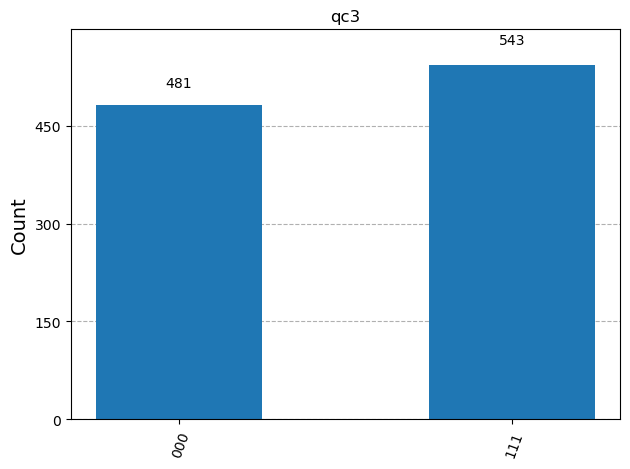


Results for qc_bar: {'111': 476, '100': 548}


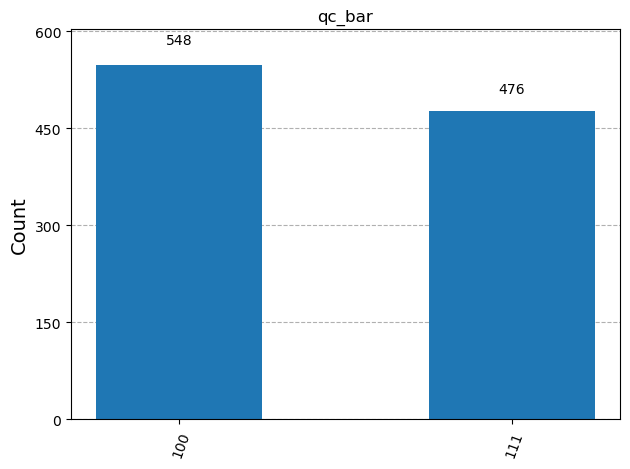

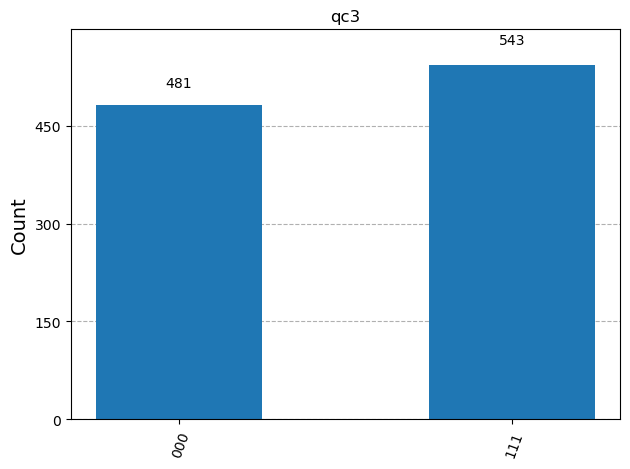

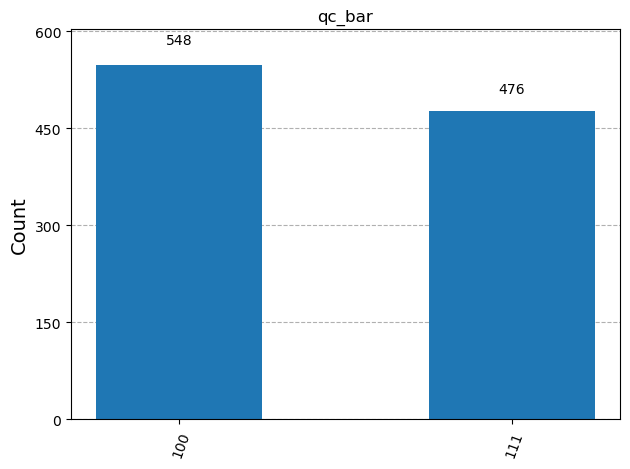

In [13]:
sim = AerSimulator()
for label, circ in [('qc3', qc3), ('qc_bar', qc_bar)]:
    compiled = transpile(circ, sim)
    job = sim.run(compiled, shots=1024)
    res = job.result()
    counts = res.get_counts()
    print(f"\nResults for {label}: {counts}")
    # histogram
    from qiskit.visualization import plot_histogram
    display(plot_histogram(counts, title=label))
